In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
# Carga dataset
data = pd.read_csv('C:/DATA/Mall_Customers.csv')
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

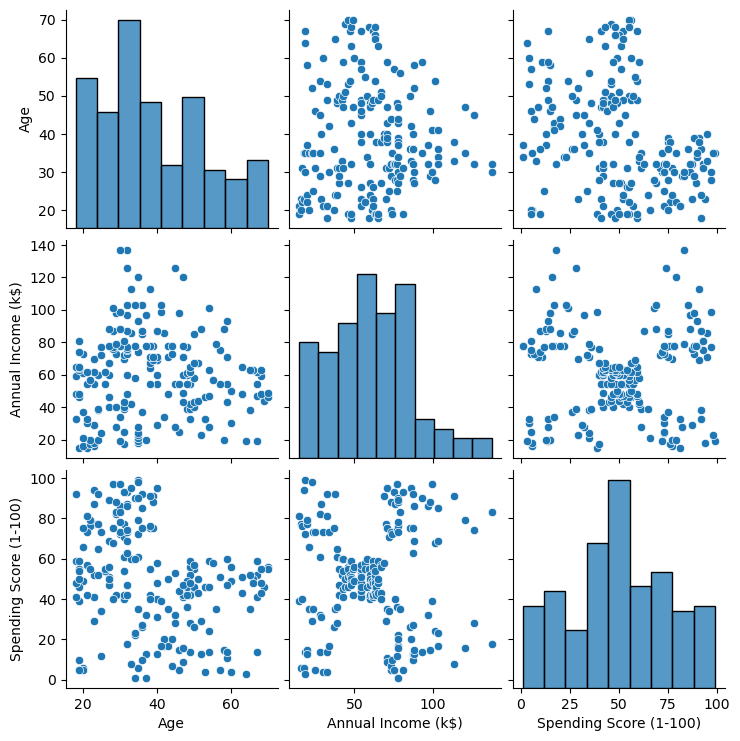

In [4]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

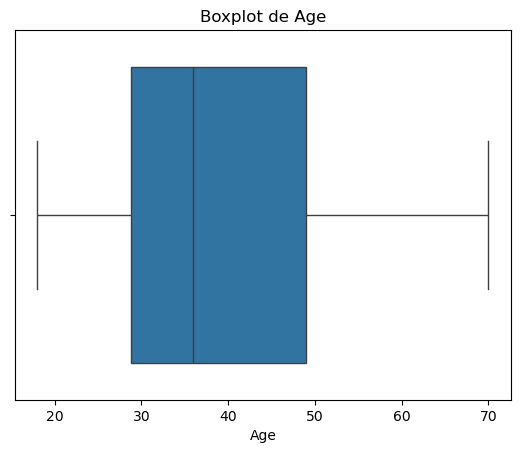

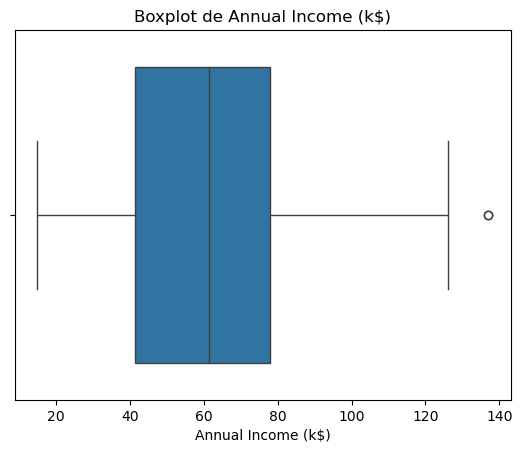

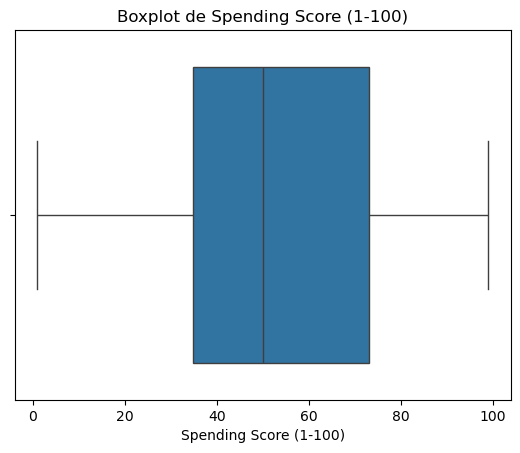

In [5]:
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [6]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [37]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

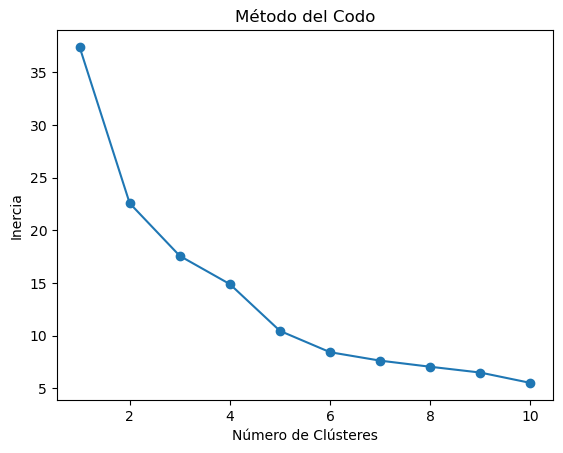

In [10]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()

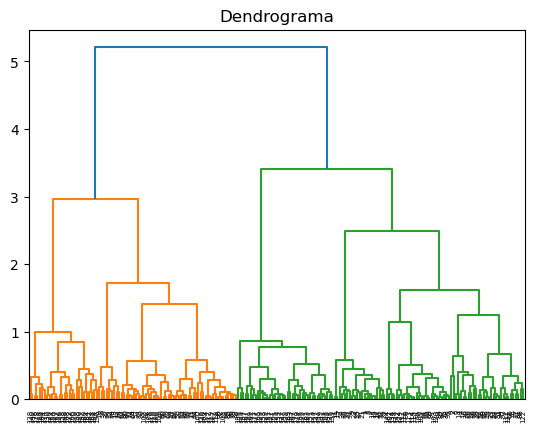

In [11]:
linked = linkage(data_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrograma')
plt.show()

In [12]:

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Coeficiente de Silhouette: {silhouette_avg}')


Coeficiente de Silhouette: 0.420765865581382


C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f'Número de Clústeres: {n_clusters}, Silhouette: {silhouette_avg}')

Número de Clústeres: 2, Silhouette: 0.3652498066402899
Número de Clústeres: 3, Silhouette: 0.34027933104942176
Número de Clústeres: 4, Silhouette: 0.3658639415445344
Número de Clústeres: 5, Silhouette: 0.40421034059490324
Número de Clústeres: 6, Silhouette: 0.4191792861638622
Número de Clústeres: 7, Silhouette: 0.420765865581382
Número de Clústeres: 8, Silhouette: 0.36744992310528146
Número de Clústeres: 9, Silhouette: 0.36291273937941737
Número de Clústeres: 10, Silhouette: 0.366103860035204


C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


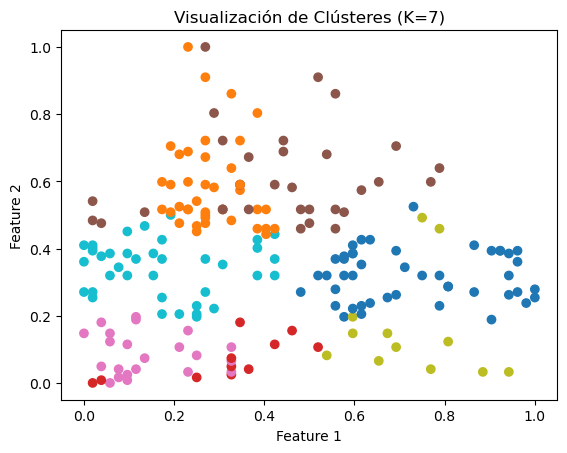

In [14]:
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(data_scaled)

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='tab10')
plt.title('Visualización de Clústeres (K=7)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [15]:
for n_clusters in [5, 6, 7]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    ch_score = calinski_harabasz_score(data_scaled, labels)
    print(f'Número de Clústeres: {n_clusters}, Calinski-Harabasz: {ch_score}')

Número de Clústeres: 5, Calinski-Harabasz: 125.93103938550396
Número de Clústeres: 6, Calinski-Harabasz: 133.6382941733873
Número de Clústeres: 7, Calinski-Harabasz: 125.82090111294697


C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\SISTEMAS_PERSONERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


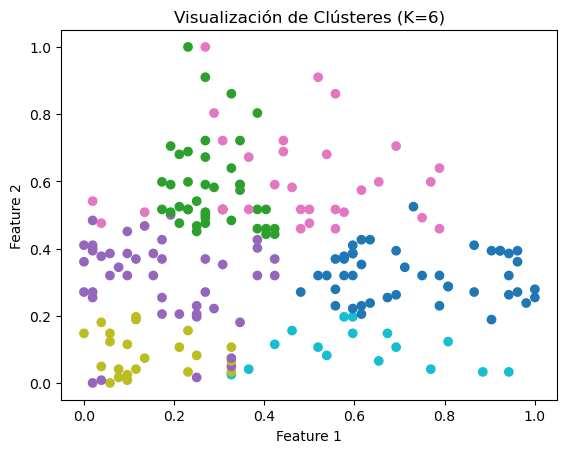

In [16]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(data_scaled)

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='tab10')
plt.title('Visualización de Clústeres (K=6)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


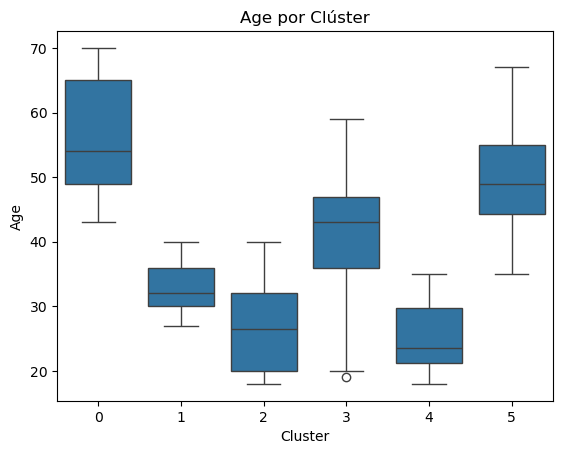

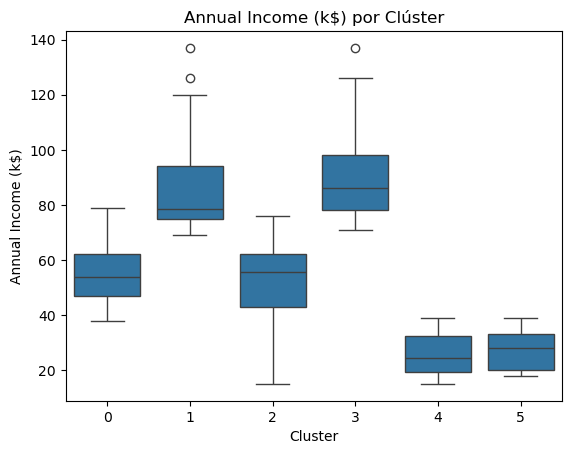

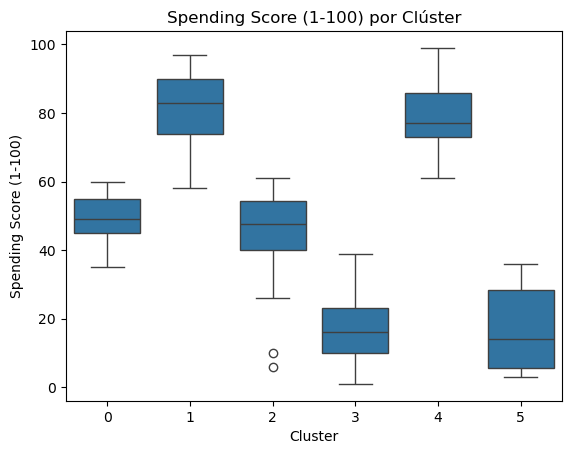

In [17]:
data['Cluster'] = labels
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'{col} por Clúster')
    plt.show()


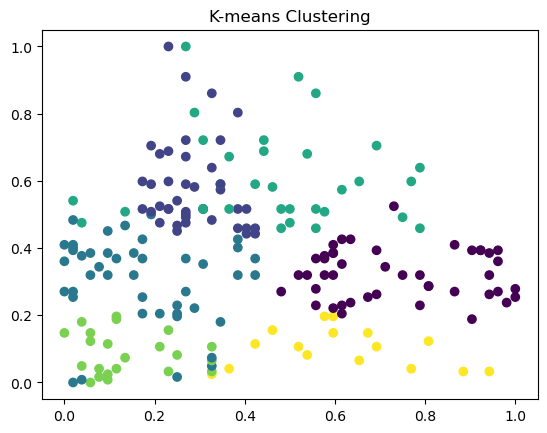

In [41]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

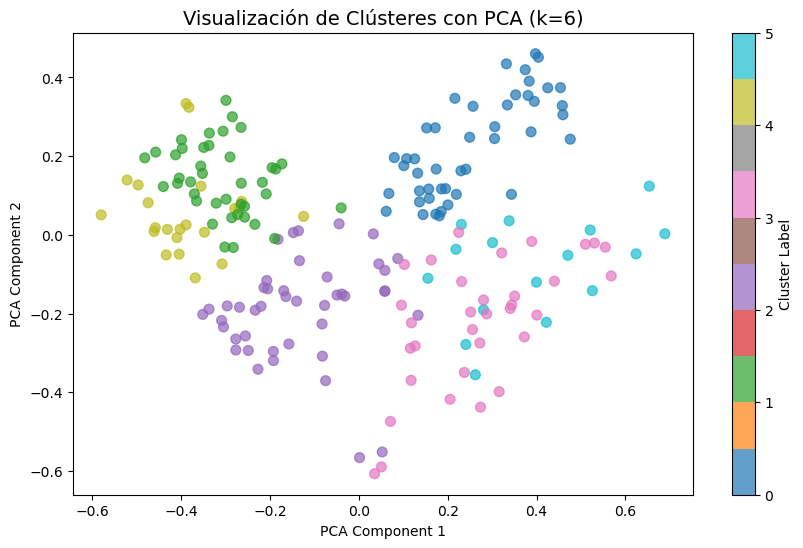

In [43]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='tab10', s=50, alpha=0.7)
plt.title('Visualización de Clústeres con PCA (k=6)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


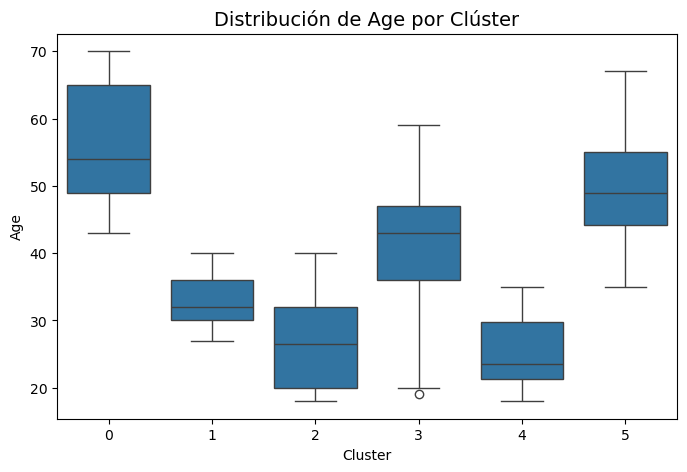

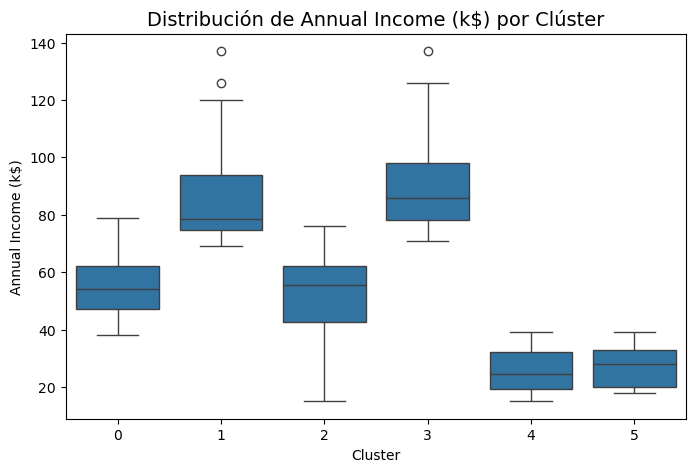

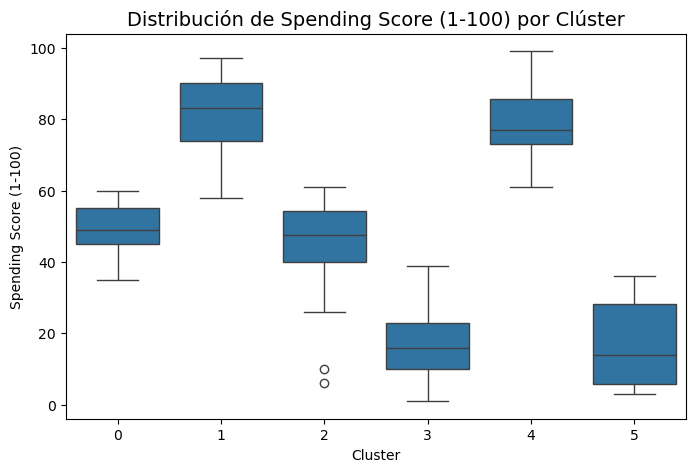

In [45]:
data['Cluster'] = labels
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'Distribución de {col} por Clúster', fontsize=14)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()
